<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.1 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [24]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Missing Industry Data: 55.90%


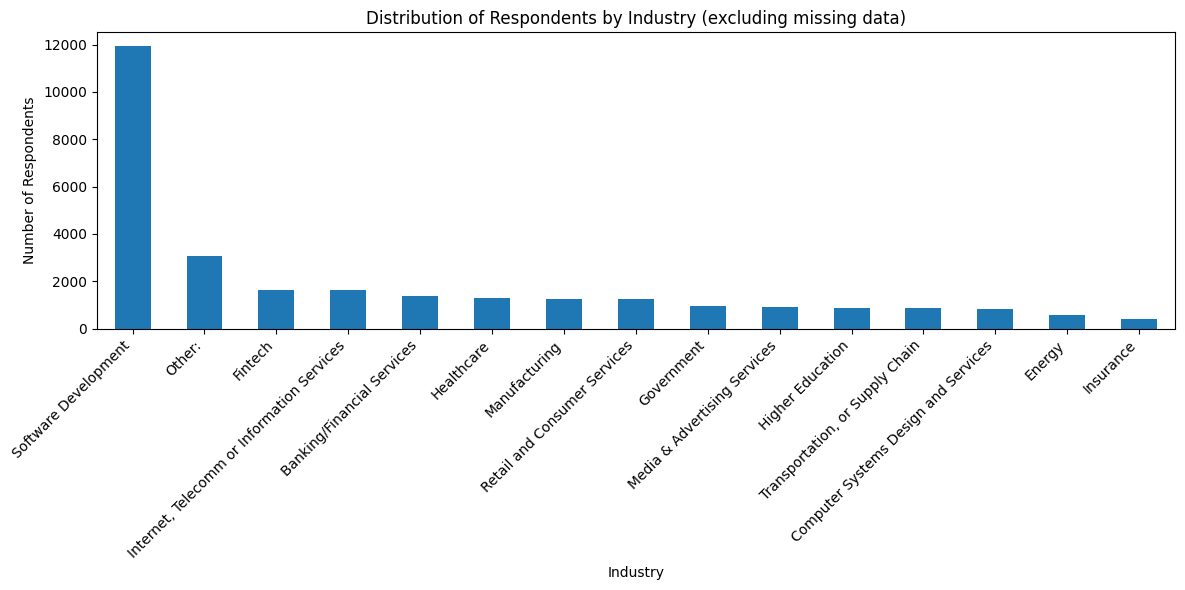

Because 55.90% of the data is missing, the following visualization reflecs only the respondents who provided Industry information. Results may not respresent the full dataset.
We can see that Software Development is most common in this sample with most other options with a relatively similar count.


In [25]:
##Write your code here
#df['Industry'].isna().sum()

# check missingness
missing_pct = df['Industry'].isna().mean()*100
print(f'Missing Industry Data: {missing_pct:.2f}%')

# prepare data and drop NaN
industry_counts = df['Industry'].value_counts(dropna=True)

# plot
plt.figure(figsize=(12,6))
industry_counts.plot(kind='bar')
plt.title("Distribution of Respondents by Industry (excluding missing data)")
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f'Because {missing_pct:.2f}% of the data is missing, the following visualization reflecs only the respondents who provided Industry information. Results may not respresent the full dataset.')
print(f'We can see that Software Development is most common in this sample with most other options with a relatively similar count.')


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [26]:
##Write your code here
# drop NaN
comp = df['ConvertedCompYearly'].dropna()

# convert to numeric in case of strings
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# calc basic stats
mean = df['ConvertedCompYearly'].mean()
median = df['ConvertedCompYearly'].median()
std = df['ConvertedCompYearly'].std()
minimum = df['ConvertedCompYearly'].min()
maximum = df['ConvertedCompYearly'].max()

# Threshold
threshold = mean + 3 * std

# identify outliers 
outliers = df[df['ConvertedCompYearly'] > threshold]

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Std Dev: {std}')
print(f'Threshold for outliers: {threshold}')
print(f'Number of outliers: {outliers.shape[0]}')
print(f'Outliers:\n{outliers['ConvertedCompYearly']}')
print('Rows with missing compensation(approx. 42k respondents) were excluded from this analysis since they were NaN.')



Mean: 86155.28726264134
Median: 65000.0
Std Dev: 186756.97308629757
Threshold for outliers: 646426.2065215341
Number of outliers: 89
Outliers:
529       650000.0
828      1000000.0
1932      945000.0
2171      750000.0
2187     2000000.0
           ...    
38219    1000000.0
39643    1300000.0
40066     800000.0
40952     750000.0
41027     700000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64
Rows with missing compensation(approx. 42k respondents) were excluded from this analysis since they were NaN.


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of IQR outliers: 978


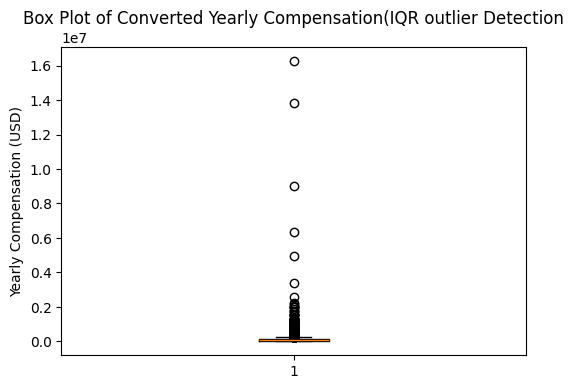

In [27]:
##Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp1 = df['ConvertedCompYearly'].dropna()

Q1 = comp1.quantile(0.25)
Q3 = comp1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print('Number of IQR outliers:', iqr_outliers.shape[0])

plt.figure(figsize=(6,4))
plt.boxplot(comp1)
plt.title('Box Plot of Converted Yearly Compensation(IQR outlier Detection')
plt.ylabel('Yearly Compensation (USD)')
plt.show()

#pabsrint(iqr_outliers['ConvertedCompYearly'])

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [28]:
##Write your code here
df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
]

print('Original DatFrame size:', df.shape)
print('New DataFrame size(no IQR outliers):', df_no_outliers.shape)
print('Rows removed:', df.shape[0] - df_no_outliers.shape[0])

Original DatFrame size: (65437, 114)
New DataFrame size(no IQR outliers): (22457, 114)
Rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


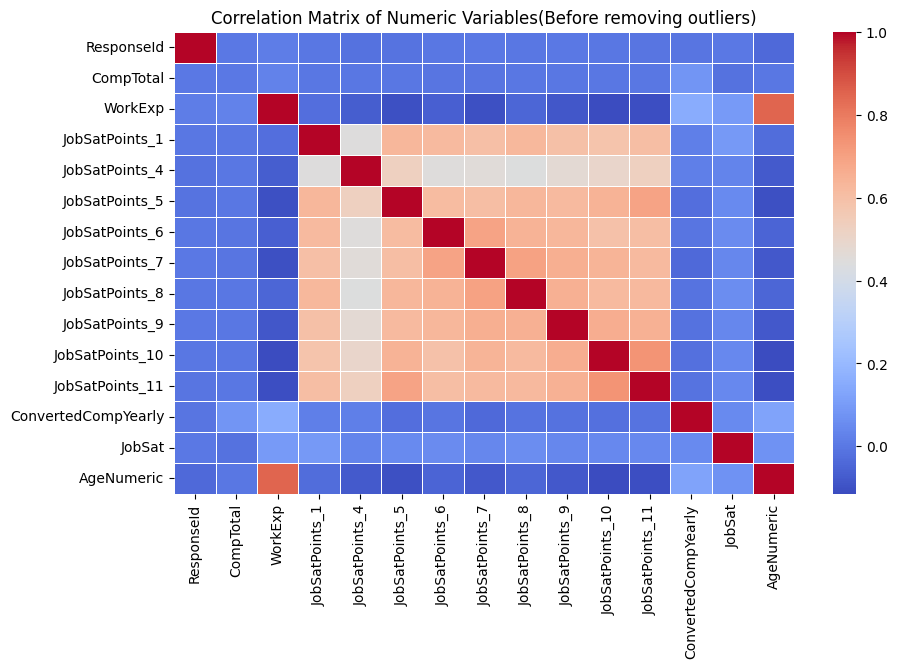

In [29]:
##Write your code here
#df['Age'].value_counts()
#df['Age'].unique()

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
#df[['Age', 'AgeNumeric']].head(20)

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
corr['AgeNumeric'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables(Before removing outliers)')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
